# DESAFIO 7: Data Wrangling

Recolección de datos, hasta el 7 de marzo de 2021, sobre COVID en 50 estados de EE.UU., el Distrito de Columbia y 5 territorios de EE.UU, extraidos desde la API de "The COVID Tracking Project"

In [1]:
import pandas as pd
import requests
import json
import missingno as msno

In [2]:
url = "https://api.covidtracking.com/v1/us/daily.json"
df = requests.get(url)
print(df)

<Response [200]>


In [3]:
# Transformar a json
json_data = json.loads(df.text)

In [4]:
# Crear dataframe
data = pd.DataFrame.from_dict(json_data)

In [5]:
data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,None,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,None,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,None,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,None,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,None,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


## Exploración de datos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

## Data Wrangling

In [7]:
# Transformar fecha a formato date
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 420 entries, 0 to 419
Series name: date
Non-Null Count  Dtype         
--------------  -----         
420 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.4 KB


### Valores duplicados

No hay valores duplicados ya que la información de este dataset está generada por día.

In [8]:
data.duplicated(subset='date')

0      False
1      False
2      False
3      False
4      False
       ...  
415    False
416    False
417    False
418    False
419    False
Length: 420, dtype: bool

### Valores nulos

In [9]:
data.isnull().sum()

date                          0
states                        0
positive                      1
negative                     48
pending                      51
hospitalizedCurrently        64
hospitalizedCumulative       51
inIcuCurrently               73
inIcuCumulative              72
onVentilatorCurrently        72
onVentilatorCumulative       79
dateChecked                   0
death                        28
hospitalized                 51
totalTestResults              0
lastModified                  0
recovered                   420
total                         0
posNeg                        0
deathIncrease                 0
hospitalizedIncrease          0
negativeIncrease              0
positiveIncrease              0
totalTestResultsIncrease      0
hash                          0
dtype: int64

<AxesSubplot:>

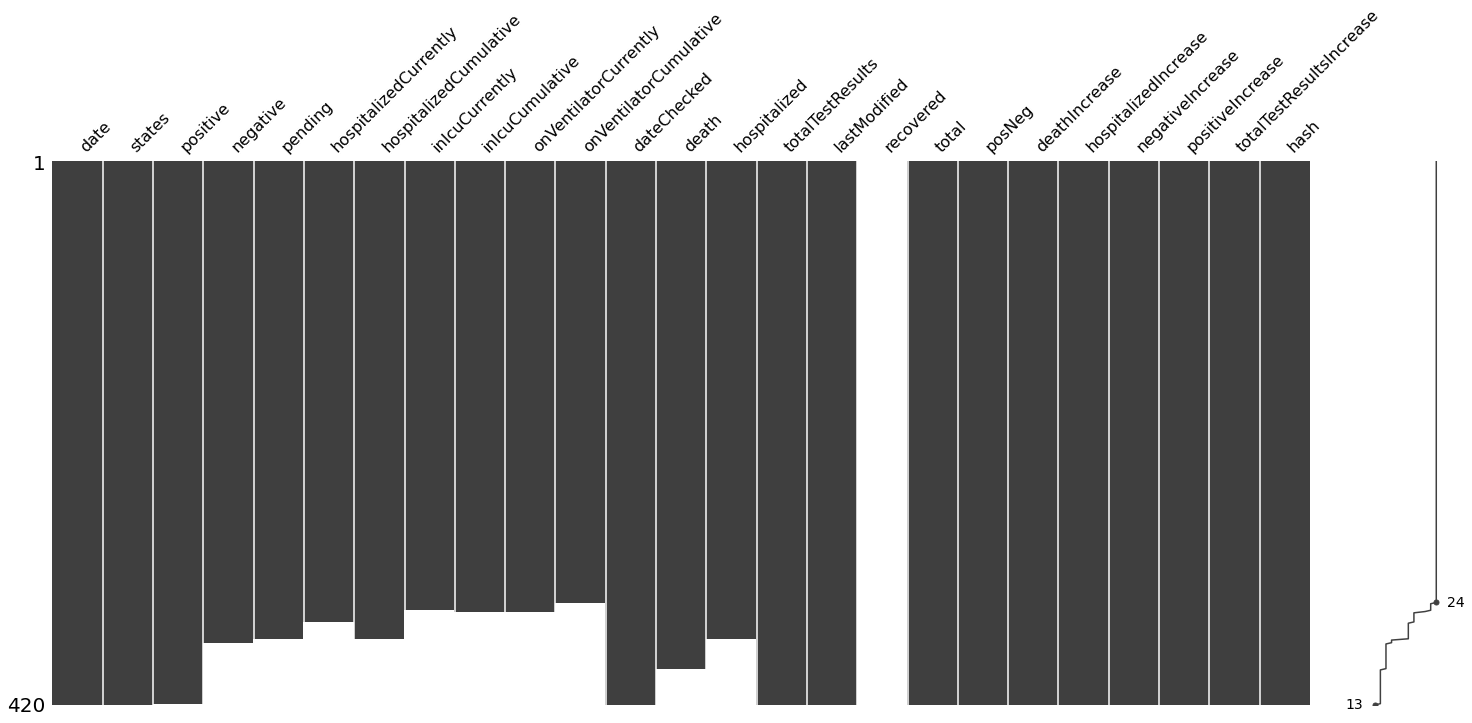

In [10]:
%matplotlib inline
msno.matrix(data)

In [11]:
# Reemplazar los valores nulos por 0
data = data.fillna(0)